In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import chardet  # Library for encoding detection
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
# Function to handle potential encoding errors while reading the CSV
def read_data(filename):
    try:
        # Try reading with UTF-8 encoding
        data = pd.read_csv(filename, encoding='utf-8')
        return data
    except UnicodeDecodeError:
        # If UTF-8 fails, attempt automatic encoding detection
        with open(filename, 'rb') as rawdata:
            result = chardet.detect(rawdata.read())
            encoding = result['encoding']
        # Read the data with the detected encoding
        data = pd.read_csv(filename, encoding=encoding)
        return data

In [4]:
# Load SMS dataset
data = read_data('/content/drive/MyDrive/CODSOFT/spam.csv')

In [5]:
# Print dataset information
print("Head of the dataset:")
print(data.head())

Head of the dataset:
     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
print("\nTail of the dataset:")
print(data.tail())


Tail of the dataset:
        v1                                                 v2 Unnamed: 2  \
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  


In [7]:
print("\nInfo of the dataset:")
print(data.info())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB
None


In [8]:
print("\nDescriptive statistics of the dataset:")
print(data.describe())


Descriptive statistics of the dataset:
          v1                      v2  \
count   5572                    5572   
unique     2                    5169   
top      ham  Sorry, I'll call later   
freq    4825                      30   

                                               Unnamed: 2  \
count                                                  50   
unique                                                 43   
top      bt not his girlfrnd... G o o d n i g h t . . .@"   
freq                                                    3   

                   Unnamed: 3 Unnamed: 4  
count                      12          6  
unique                     10          5  
top      MK17 92H. 450Ppw 16"    GNT:-)"  
freq                        2          2  


In [9]:
# Separate text messages and labels (spam or ham)
text = data['v2']
label = data['v1'].map({'ham': 0, 'spam': 1})  # Encode labels

In [10]:
# Preprocess text data (cleaning & converting to lowercase)
def clean_text(text):
    text = text.lower()  # convert to lowercase
    # Remove punctuation
    text = ''.join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    # Stem words
    stemmer = PorterStemmer()
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

text = text.apply(clean_text)

In [11]:
# Feature Engineering - TF-IDF vectorization
vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(text)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# Test model performance on unseen data
y_pred_nb = nb_model.predict(X_test)

# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Test model performance on unseen data
y_pred_lr = lr_model.predict(X_test)

# Evaluate models (accuracy, precision, recall, etc.)
print("\nMultinomial Naive Bayes Model")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Classification Report:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nLogistic Regression Model")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Multinomial Naive Bayes Model
Accuracy: 0.9614349775784753
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.71      0.83       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115

Confusion Matrix:
[[965   0]
 [ 43 107]]

Logistic Regression Model
Accuracy: 0.9443946188340807
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       965
           1       0.96      0.61      0.75       150

    accuracy                           0.94      1115
   macro avg       0.95      0.80      0.86      1115
weighted avg       0.95      0.94      0.94      1115

Confusion Matrix:
[[961   4]
 [ 58  92]]


In [12]:
# Function to plot Confusion Matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


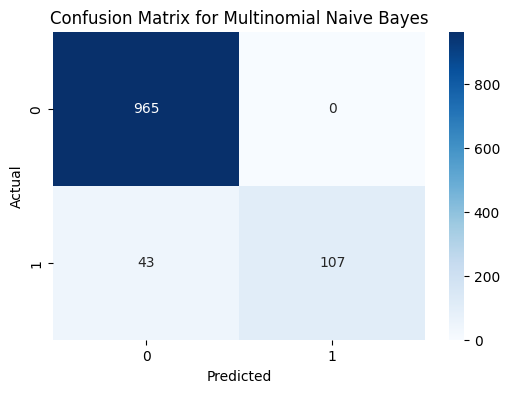

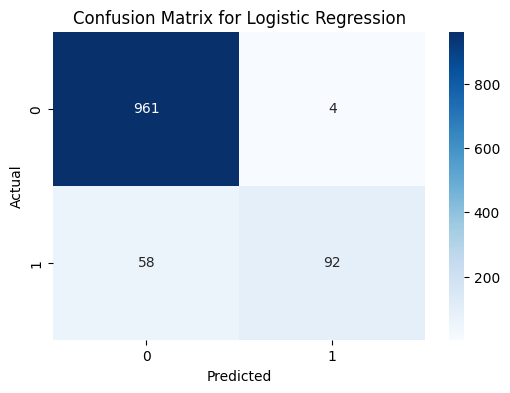

In [13]:
# Plot Confusion Matrices
plot_confusion_matrix(y_test, y_pred_nb, "Multinomial Naive Bayes")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")


In [14]:
# Function to predict spam for a new message
def predict_spam(message, model):
    # Clean and vectorize the message
    message = clean_text(message)
    message_features = vectorizer.transform([message])
    # Predict using the trained model
    prediction = model.predict(message_features)
    return prediction[0]


In [15]:
# Calculate precision, recall, f1-score, and accuracy for Multinomial Naive Bayes
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Calculate precision, recall, f1-score, and accuracy for Logistic Regression
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# Print evaluation metrics for Multinomial Naive Bayes
print("\nEvaluation metrics for Multinomial Naive Bayes Model:")
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1-score:", f1_nb)
print("Accuracy:", accuracy_nb)

# Print evaluation metrics for Logistic Regression
print("\nEvaluation metrics for Logistic Regression Model:")
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1-score:", f1_lr)
print("Accuracy:", accuracy_lr)

# Example usage of the prediction function
new_message_1 = "XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
spam_1 = predict_spam(new_message_1, nb_model)
print("\nPrediction for the new message:")
print("\nXXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL")
if spam_1:
    print("This message is likely spam.")
else:
    print("This message is likely not spam.")

new_message_2 = "No no. I will check all rooms before activities"
spam_2 = predict_spam(new_message_2, nb_model)
print("\nPrediction for the new message:")
print("\nNo no. I will check all rooms before activities")
if spam_2:
    print("This message is likely spam.")
else:
    print("This message is likely not spam.")


Evaluation metrics for Multinomial Naive Bayes Model:
Precision: 1.0
Recall: 0.7133333333333334
F1-score: 0.8326848249027238
Accuracy: 0.9614349775784753

Evaluation metrics for Logistic Regression Model:
Precision: 0.9583333333333334
Recall: 0.6133333333333333
F1-score: 0.7479674796747966
Accuracy: 0.9443946188340807

Prediction for the new message:

XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
This message is likely not spam.

Prediction for the new message:

No no. I will check all rooms before activities
This message is likely not spam.
